In [99]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the csv files
data = pd.read_csv('../artifacts/sentiment_analysis.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data preprocessing

In [4]:
# view the data shape
data.shape

(7920, 3)

In [6]:
# check the duplicated exist or not
data.duplicated().sum()

np.int64(0)

In [8]:
# check the is there's exist null or not
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# text pre processing

In [9]:
# import regular expressions & string
import re
import string

# convert uppercase to lowercase

In [14]:
# using the lambda function
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
# now i can see the tweet label convert to the lowercase
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [22]:
# remove links
data["tweet"] = data["tweet"].apply(lambda x: re.sub(r'https?://\S+', '', x))



In [23]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


# remove the punctuation

In [29]:
# these are thing will it removes
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuation)

In [27]:
# after remove that
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


In [32]:
# now remove the digits
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)


In [33]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red instagr...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app mobi...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


# now remove the stop words as am , in so like


In [35]:
# first we need to install the nltk library
!pip install nltk

  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 536.7 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.5 MB 536.7 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 650.4 kB/s eta 0:00:02
   --------------------------- ------------ 1.0/1.5 MB 715.1 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 715.1 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 690.0 kB/s  0:00:02
Using cached click-8.3.0-py3-none-any.whl (107 kB)

   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# then import that
import nltk

In [39]:
# inlt includes the more stop words then we can download that as chose the path also
nltk.download('stopwords', download_dir='../static/model')


[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [40]:
# now i have to select only the english relates stop words
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [41]:
# view that english stop words
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [45]:
# now remove that stop words in tweet label

data["tweet"] = data["tweet"].apply(lambda x: " ".join(word for word in x.split() if word not in sw))
data.head()


,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


# stemming

In [47]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [48]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [49]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


# now build the vocabulary

In [52]:
from collections import Counter
vocab  = Counter()


In [53]:
# this is the exmaple of how to check the word count

vocab.update(['java', 'python', 'java'])
vocab

Counter({'java': 2, 'python': 1})

In [56]:
# split the sentences in to word and check the count of each word
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [59]:
# now ypu can see the word count of each word
vocab


Counter({'iphon': 8146,
         'appl': 5752,
         'samsung': 2790,
         'new': 2274,
         'phone': 2030,
         'follow': 1770,
         'soni': 1638,
         '…': 1512,
         'ipad': 1074,
         'rt': 1050,
         'love': 998,
         'like': 912,
         'day': 852,
         'app': 832,
         'life': 830,
         'android': 828,
         'photo': 788,
         'get': 766,
         'io': 766,
         'galaxi': 722,
         'instagram': 716,
         'case': 696,
         'beauti': 644,
         'cute': 644,
         'gain': 622,
         'today': 618,
         'work': 612,
         'im': 588,
         'back': 588,
         'fuck': 586,
         'happi': 586,
         'photographi': 584,
         'game': 566,
         'got': 560,
         'fun': 554,
         'news': 530,
         'music': 528,
         'thank': 526,
         'time': 496,
         'make': 494,
         'updat': 472,
         'smile': 462,
         'instagood': 452,
         'funni': 446

In [60]:
len(vocab)

15905

In [65]:
# then overfit the model bacuase features ane greater that the raw
# now reduce that using reature scaling
# we drop the feature where frequent > 10

token = [key for key in vocab if vocab[key] > 20]
token

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [66]:
# now view the features
len(token)

1146

In [68]:
def save_vocab(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocab(token, '../static/model/vocab.txt')

# devide the dataset

In [70]:
x = data["tweet"]
y = data["label"]



In [71]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [72]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [78]:
# now import the tran test split from sklearn
# trains 80% and test 20%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [80]:
# now we can see the shape train and test shape for the x and y
x_train.shape



(6336,)

In [81]:
x_test.shape

(1584,)

In [82]:
y_train.shape

(6336,)

In [83]:
y_test.shape

(1584,)

# now vecorize the words

In [90]:
import numpy as np

def vectorize(ds, vocabulary):
    vector_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))  # start with zeros

        words = sentence.split()  # split the sentence into tokens

        for i, word in enumerate(vocabulary):
            if word in words:
                sentence_list[i] = 1   # set 1 only if word exists in sentence

        vector_list.append(sentence_list)

    vector_array = np.asarray(vector_list, dtype=np.float32)
    return vector_array


In [91]:
vectorized_x_train = vectorize(x_train, token)
vectorized_x_test  = vectorize(x_test, token)


In [92]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1146), dtype=float32)

In [93]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1146), dtype=float32)

In [94]:
y_train

2419    1
6517    0
1191    0
589     0
3681    0
       ..
800     0
6983    0
3426    0
4854    0
3598    1
Name: label, Length: 6336, dtype: int64

In [95]:
y_test

2403    0
7077    0
6415    0
1393    1
4234    1
       ..
5783    0
4852    0
4605    0
1536    0
4416    0
Name: label, Length: 1584, dtype: int64

In [96]:
# then show the inbalnced data set
y_train.value_counts()

label
0    4712
1    1624
Name: count, dtype: int64

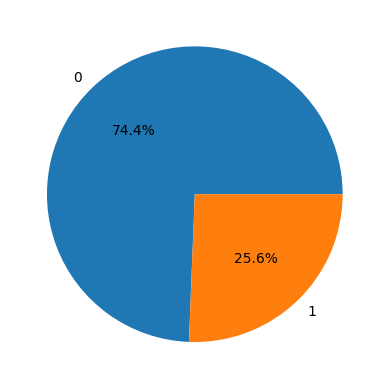

In [102]:
# you can see the inbalnce dataset
counts = y_train.value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.show()

In [105]:
# we need to insatall that imblear
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
# now we handle that inbalnced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)

print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9424, 1146) (9424,)


In [108]:
y_train_smote.value_counts()

label
1    4712
0    4712
Name: count, dtype: int64

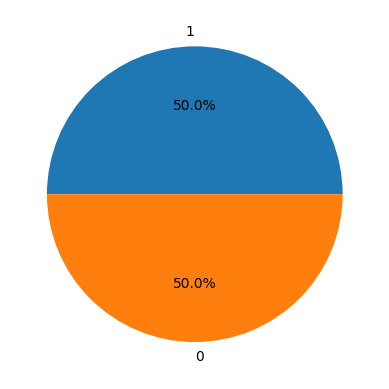

In [109]:
# now you can see the balanced data
counts = y_train_smote.value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.show()

# model trainning

In [112]:
# import ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [114]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_score(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr  = round(precision_score(y_act, y_pred, average='macro'), 3)
    rec = round(recall_score(y_act, y_pred, average='macro'), 3)
    f1  = round(f1_score(y_act, y_pred, average='macro'), 3)

    print(f"Trainng Scores:")
    print(f"\tAccuracy  = {acc}")
    print(f"\tPrecision = {pr}")
    print(f"\tRecall    = {rec}")
    print(f"\tF1-Score  = {f1}")

def validation_score(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr  = round(precision_score(y_act, y_pred, average='macro'), 3)
    rec = round(recall_score(y_act, y_pred, average='macro'), 3)
    f1  = round(f1_score(y_act, y_pred, average='macro'), 3)

    print(f"Testing Scores:")
    print(f"\tAccuracy  = {acc}")
    print(f"\tPrecision = {pr}")
    print(f"\tRecall    = {rec}")
    print(f"\tF1-Score  = {f1}")

    


In [115]:
# logistic regression
lr  = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [116]:
y_train_pred  = lr.predict(vectorized_x_train_smote)
y_train_pred

array([1, 1, 0, ..., 1, 1, 1], shape=(9424,))

In [117]:
y_train_smote

0       1
1       0
2       0
3       0
4       0
       ..
9419    1
9420    1
9421    1
9422    1
9423    1
Name: label, Length: 9424, dtype: int64

In [118]:
training_score(y_train_smote, y_train_pred)

Trainng Scores:
	Accuracy  = 0.943
	Precision = 0.944
	Recall    = 0.943
	F1-Score  = 0.943


In [119]:
y_test_pred = lr.predict(vectorized_x_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1584,))

In [120]:
y_test

2403    0
7077    0
6415    0
1393    1
4234    1
       ..
5783    0
4852    0
4605    0
1536    0
4416    0
Name: label, Length: 1584, dtype: int64

In [121]:
validation_score(y_test, y_test_pred)

Testing Scores:
	Accuracy  = 0.859
	Precision = 0.81
	Recall    = 0.842
	F1-Score  = 0.824


# naive base


In [123]:
mnb  = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred  = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)
training_score(y_train_smote, y_train_pred)
validation_score(y_test, y_test_pred)

Trainng Scores:
	Accuracy  = 0.907
	Precision = 0.91
	Recall    = 0.907
	F1-Score  = 0.906
Testing Scores:
	Accuracy  = 0.857
	Precision = 0.811
	Recall    = 0.873
	F1-Score  = 0.831


# decision tree

In [124]:
dt  = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred  = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)
training_score(y_train_smote, y_train_pred)
validation_score(y_test, y_test_pred)

Trainng Scores:
	Accuracy  = 1.0
	Precision = 1.0
	Recall    = 1.0
	F1-Score  = 1.0
Testing Scores:
	Accuracy  = 0.814
	Precision = 0.755
	Recall    = 0.753
	F1-Score  = 0.754


# random forrest

In [129]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred  = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)
training_score(y_train_smote, y_train_pred)
validation_score(y_test, y_test_pred)

Trainng Scores:
	Accuracy  = 1.0
	Precision = 1.0
	Recall    = 1.0
	F1-Score  = 1.0
Testing Scores:
	Accuracy  = 0.863
	Precision = 0.821
	Recall    = 0.814
	F1-Score  = 0.817


# suppoer vector machine

In [130]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred  = svm.predict(vectorized_x_train_smote)
y_test_pred = svm.predict(vectorized_x_test)
training_score(y_train_smote, y_train_pred)
validation_score(y_test, y_test_pred)

Trainng Scores:
	Accuracy  = 0.979
	Precision = 0.98
	Recall    = 0.979
	F1-Score  = 0.979
Testing Scores:
	Accuracy  = 0.869
	Precision = 0.823
	Recall    = 0.846
	F1-Score  = 0.833


In [131]:
# model build and save it as pickle format

In [132]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)